In [1]:
from pyspark.sql import SparkSession

In [2]:
import pandas as pd
import numpy as np
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
spark = SparkSession.builder.appName('DataCoSupplyChain').getOrCreate()
my_data = spark.read.csv('DataCoSupplyChainDataset.csv', header = True, inferSchema = True)
my_data.printSchema()

22/04/30 01:27:40 WARN Utils: Your hostname, Aditya-Legion resolves to a loopback address: 127.0.1.1; using 172.20.0.191 instead (on interface eth0)
22/04/30 01:27:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/30 01:27:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- Type: string (nullable = true)
 |-- Days for shipping (real): integer (nullable = true)
 |-- Days for shipment (scheduled): integer (nullable = true)
 |-- Benefit per order: double (nullable = true)
 |-- Sales per customer: double (nullable = true)
 |-- Delivery Status: string (nullable = true)
 |-- Late_delivery_risk: integer (nullable = true)
 |-- Category Id: integer (nullable = true)
 |-- Category Name: string (nullable = true)
 |-- Customer City: string (nullable = true)
 |-- Customer Country: string (nullable = true)
 |-- Customer Email: string (nullable = true)
 |-- Customer Fname: string (nullable = true)
 |-- Customer Id: integer (nullable = true)
 |-- Customer Lname: string (nullable = true)
 |-- Customer Password: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Customer State: string (nullable = true)
 |-- Customer Street: string (nullable = true)
 |-- Customer Zipcode: integer (nullable = true)
 |-- Department Id: integer (nullable = 

In [4]:
print((my_data.count(), len(my_data.columns)))

(180519, 53)


In [5]:
df = my_data.toPandas()

22/04/30 01:27:47 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [6]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,None,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,None,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,None,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,None,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [7]:
# shipping_indexer = StringIndexer(inputCol='Shipping Mode', outputCol='Shipping Mode Indx')
# shipping_indexer_model = shipping_indexer.fit(my_data)
# my_data = shipping_indexer_model.transform(my_data)

In [8]:
df_1 = df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Delivery Status', 'Late_delivery_risk', 'Product Status', 'Shipping Mode']]
df_1.head()

,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Product Status,Shipping Mode
0,3,4,Advance shipping,0,0,Standard Class
1,5,4,Late delivery,1,0,Standard Class
2,4,4,Shipping on time,0,0,Standard Class
3,3,4,Advance shipping,0,0,Standard Class
4,2,4,Advance shipping,0,0,Standard Class


In [9]:
ship_df = pd.get_dummies(df["Shipping Mode"])

In [10]:
df_final = pd.concat([df, ship_df], axis=1)

In [11]:
df_final.head(0)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,First Class,Same Day,Second Class,Standard Class


In [12]:
#assemblr = VectorAssembler(inputCols=['Days for shipping (real)','Days for shipment (scheduled)', 'Product Status', 'Shipping Mode Indx'], outputCol='featureData')
#my_data = assemblr.transform(my_data)
y = df_final['Late_delivery_risk']
X = df_final[['Days for shipping (real)','Days for shipment (scheduled)','Product Status','First Class', 'Same Day','Second Class', 'Standard Class']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
y_train

70228     1
51588     1
41336     0
43009     1
131729    1
         ..
152315    1
176963    1
117952    0
173685    1
43567     1
Name: Late_delivery_risk, Length: 144415, dtype: int32

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [17]:
model_rf = RandomForestClassifier()
model_fit = model_rf.fit(X_train, y_train)
model_predictions = model_fit.predict(X_test)
accuracy_score(y_test, model_predictions)

0.9742964768446709

In [18]:
print(confusion_matrix(y_test,model_predictions))

[[15456   928]
 [    0 19720]]


<AxesSubplot:>

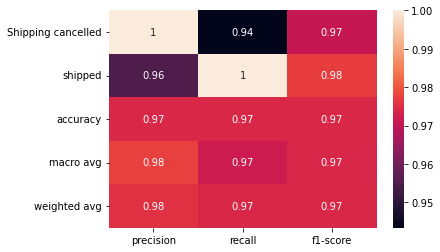

In [19]:
clf_report = classification_report(y_test,
                                model_predictions,
                                   target_names=['Shipping cancelled','shipped'],
            
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [20]:
data_2 = spark.read.csv('DataCoSupplyChainDataset.csv', header = True, inferSchema = True).toPandas()

In [21]:
data_2.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [22]:
bpo = np.array(data_2["Benefit per order"])

In [23]:
bpo_2 = np.linalg.norm(bpo)

In [24]:
from sklearn import preprocessing

In [25]:
bpo.reshape(-1, 1)

array([[  91.25     ],
       [-249.0899963],
       [-247.7799988],
       ...,
       [ 141.1100006],
       [ 186.2299957],
       [ 168.9499969]])

In [26]:
scale = preprocessing.MinMaxScaler()

In [27]:
scale.fit(bpo.reshape(-1, 1))

MinMaxScaler()

In [28]:
bpo = scale.transform(bpo.reshape(-1, 1))

In [29]:
data_2["Benefit per order Normalized"] = bpo

In [30]:
data_2.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Benefit per order Normalized
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,0.841800
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,0.776183
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,0.776435
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,0.828614
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,0.850082


In [31]:
data_3 = data_2[['Days for shipping (real)','Days for shipment (scheduled)','Benefit per order Normalized','Sales per customer','Delivery Status']]

In [32]:
X = data_3[['Days for shipping (real)','Days for shipment (scheduled)','Benefit per order Normalized']]

In [33]:
y = data_2['Delivery Status']

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb = GaussianNB()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
nb.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = nb.predict(X_test)

In [39]:
classification_report(y_test, y_pred)

/home/aditya/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aditya/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aditya/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                   precision    recall  f1-score   support\n\n Advance shipping       0.64      1.00      0.78      8428\n    Late delivery       0.86      1.00      0.92     19720\nShipping canceled       0.00      0.00      0.00      1593\n Shipping on time       0.00      0.00      0.00      6363\n\n         accuracy                           0.78     36104\n        macro avg       0.38      0.50      0.43     36104\n     weighted avg       0.62      0.78      0.69     36104\n'

In [40]:
accuracy_score(y_test, y_pred)

0.7793042322180368

/home/aditya/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aditya/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aditya/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

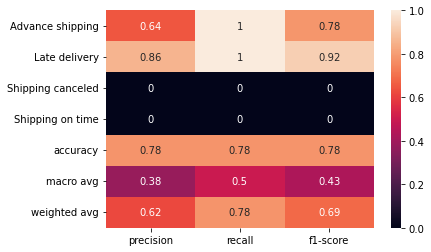

In [41]:
clf_report = classification_report(y_test,
                                 y_pred,
            
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)